In [10]:
import lead_lag as ll
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [ ]:
# For general relationship (both linear and non-linear), so yield weak signal.
# Separate script are built to focus on linear relationships.
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data.index = [datetime(2024, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(data.shape[0])]
data

0          1          2          3          4   \
2024-01-01 12:00:00  38.250000  69.059998  62.080002  31.799999  63.009998   
2024-01-01 11:59:59  38.110001  69.980003  62.389999  31.740000  62.490002   
2024-01-01 11:59:58  37.900002  69.559998  62.820000  31.570000  62.740002   
2024-01-01 11:59:57  37.639999  69.389999  63.259998  31.559999  61.849998   
2024-01-01 11:59:56  37.700001  69.709999  64.040001  31.420000  62.020000   
...                        ...        ...        ...        ...        ...   
2024-01-01 11:43:25  33.000000  50.720001  49.669998  34.369999  42.130001   
2024-01-01 11:43:24  32.880001  50.779999  49.549999  34.349998  41.599998   
2024-01-01 11:43:23  32.590000  51.009998  49.880001  33.720001  41.580002   
2024-01-01 11:43:22  32.570000  50.730000  50.180000  34.240002  41.520000   
2024-01-01 11:43:21  32.500000  50.689999  49.299999  33.990002  41.380001   

                            5          6          7          8          9   \
2024-01-01 12:00:00  28.299999  36.930000  43.230000  42.310001  67.370003   
2024-01-01 11:59:59  28.230000  37.130001  42.849998  41.849998  68.410004   
2024-01-01 11:59:58  28.600000  36.570000  42.990002  41.480000  69.839996   
2024-01-01 11:59:57  28.670000  37.090000  43.230000  41.240002  70.360001   
2024-01-01 11:59:56  28.420000  37.090000  42.900002  41.400002  69.120003   
...                        ...        ...        ...        ...        ...   
2024-01-01 11:43:25  24.850000  17.150000  45.520000  31.030001  51.680000   
2024-01-01 11:43:24  24.840000  16.940001  46.130001  30.770000  53.430000   
2024-01-01 11:43:23  25.000000  16.879999  45.610001  31.160000  52.480000   
2024-01-01 11:43:22  25.010000  16.690001  45.750000  31.520000  52.330002   
2024-01-01 11:43:21  24.750000  16.510000  46.810001  31.299999  52.590000   

                     ...         40         41         42         43  \
2024-01-01 12:00:00  ...  74.389999  41.299999  30.049999  39.529999   
2024-01-01 11:59:59  ...  74.690002  41.700001  30.180000  38.930000   
2024-01-01 11:59:58  ...  75.139999  41.139999  30.090000  38.169998   
2024-01-01 11:59:57  ...  75.239998  41.380001  30.080000  38.240002   
2024-01-01 11:59:56  ...  75.330002  41.689999  30.340000  37.849998   
...                  ...        ...        ...        ...        ...   
2024-01-01 11:43:25  ...  77.370003  35.490002  28.299999  27.780001   
2024-01-01 11:43:24  ...  77.480003  35.849998  28.129999  28.000000   
2024-01-01 11:43:23  ...  77.709999  36.259998  27.719999  27.940001   
2024-01-01 11:43:22  ...  77.279999  36.389999  27.740000  27.850000   
2024-01-01 11:43:21  ...  77.370003  36.270000  28.010000  28.209999   

                            44         45         46         47         48  \
2024-01-01 12:00:00  76.070000  28.620001  72.029999  24.020000  76.029999   
2024-01-01 11:59:59  75.709999  28.469999  72.110001  24.040001  76.050003   
2024-01-01 11:59:58  75.559998  28.480000  72.540001  23.760000  75.660004   
2024-01-01 11:59:57  75.349998  28.590000  73.750000  23.969999  75.709999   
2024-01-01 11:59:56  75.209999  28.549999  74.320000  24.010000  75.769997   
...                        ...        ...        ...        ...        ...   
2024-01-01 11:43:25  69.379997  27.570000  67.430000  16.059999  83.250000   
2024-01-01 11:43:24  69.309998  27.610001  67.959999  16.100000  83.260002   
2024-01-01 11:43:23  69.199997  27.450001  66.919998  16.219999  83.370003   
2024-01-01 11:43:22  68.930000  27.290001  66.849998  16.000000  83.320000   
2024-01-01 11:43:21  68.550003  27.090000  67.389999  15.950000  83.699997   

                            49  
2024-01-01 12:00:00  27.500000  
2024-01-01 11:59:59  27.540001  
2024-01-01 11:59:58  27.549999  
2024-01-01 11:59:57  27.740000  
2024-01-01 11:59:56  27.540001  
...                        ...  
2024-01-01 11:43:25  27.500000  
2024-01-01 11:43:24  27.410000  
2024-01-01 11:43:23  27.450001  
2024-01-01 11:43:22  2

In [12]:
data[1]

2024-01-01 12:00:00    69.059998
2024-01-01 11:59:59    69.980003
2024-01-01 11:59:58    69.559998
2024-01-01 11:59:57    69.389999
2024-01-01 11:59:56    69.709999
                         ...    
2024-01-01 11:43:25    50.720001
2024-01-01 11:43:24    50.779999
2024-01-01 11:43:23    51.009998
2024-01-01 11:43:22    50.730000
2024-01-01 11:43:21    50.689999
Name: 1, Length: 1000, dtype: float32

In [13]:
ts = pd.Series(
    data=np.cumsum(np.random.uniform(low=-1, high=1, size=1000)),
    index=[datetime(2022, 1, 1, 12, 0, 0) - timedelta(seconds=i) for i in range(1000)]
)
print('lag=', ll.lag(ts, ts.shift(-9), max_lag=10))

lag= 9.0


In [14]:
total = data.sum(axis=1).pct_change().dropna()
np.corrcoef(total.iloc[1:], total.iloc[:-1])

array([[1.        , 0.41025297],
       [0.41025297, 1.        ]])

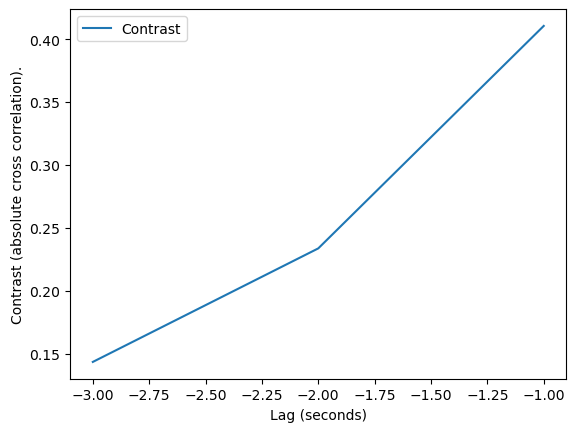

          Contrast
LagRange          
-3.0      0.143569
-2.0      0.233780
-1.0      0.410538


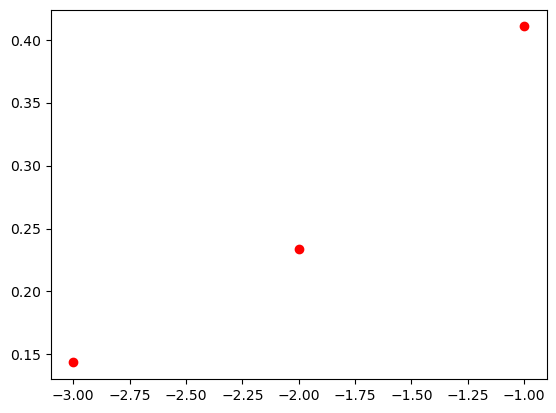

In [19]:
total = data.sum(axis=1)
lag = ll.LeadLag(
    ts1=np.log(total),
    ts2=np.log(total),
    max_lag=10,
    specific_lags=[-3, -2, -1],  # [-X seconds, +X seconds]
    min_precision=1)
lag.run_inference()
lag.plot_results()

0


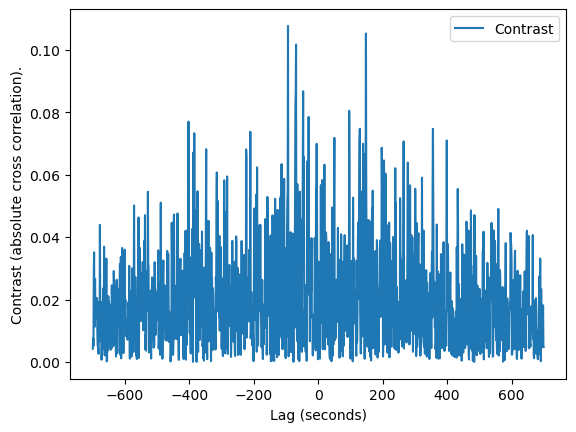

          Contrast
LagRange          
-700.0    0.004254
-699.0    0.007649
-698.0    0.005192
-697.0    0.028798
-696.0    0.035122
...            ...
 696.0    0.017132
 697.0    0.011781
 698.0    0.018133
 699.0    0.005112
 700.0    0.004819

[1401 rows x 1 columns]


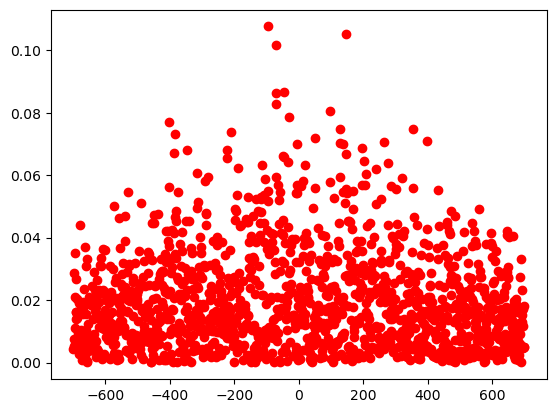

-94
1


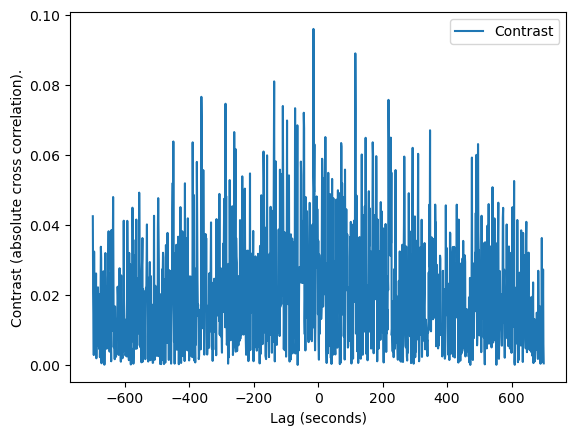

          Contrast
LagRange          
-700.0    0.042455
-699.0    0.020970
-698.0    0.014621
-697.0    0.002831
-696.0    0.032372
...            ...
 696.0    0.000860
 697.0    0.009311
 698.0    0.027263
 699.0    0.005892
 700.0    0.000463

[1401 rows x 1 columns]


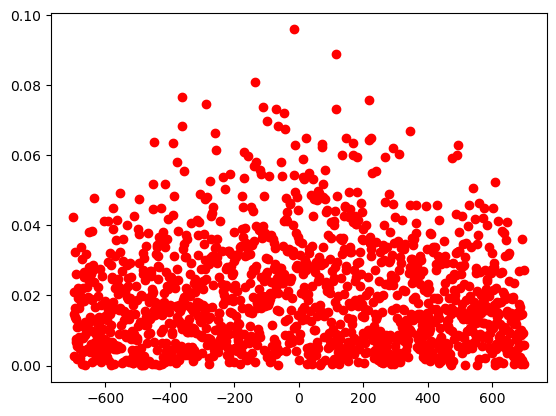

-15
2


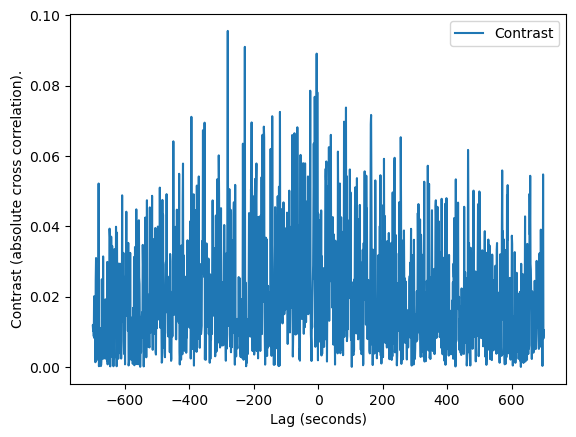

          Contrast
LagRange          
-700.0    0.011709
-699.0    0.010199
-698.0    0.012043
-697.0    0.008709
-696.0    0.020078
...            ...
 696.0    0.000290
 697.0    0.009556
 698.0    0.054736
 699.0    0.008089
 700.0    0.010432

[1401 rows x 1 columns]


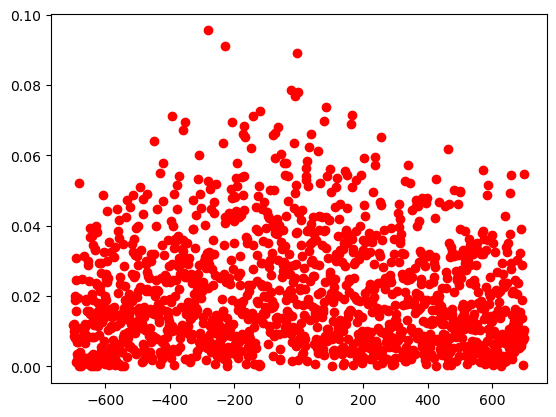

-281
3


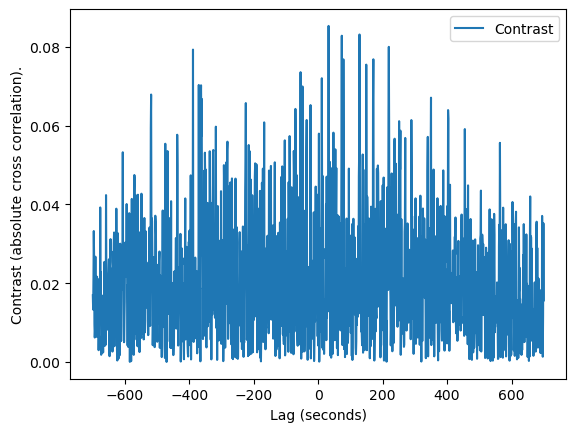

          Contrast
LagRange          
-700.0    0.016934
-699.0    0.013300
-698.0    0.021454
-697.0    0.033249
-696.0    0.026250
...            ...
 696.0    0.025599
 697.0    0.001334
 698.0    0.011717
 699.0    0.035222
 700.0    0.015633

[1401 rows x 1 columns]


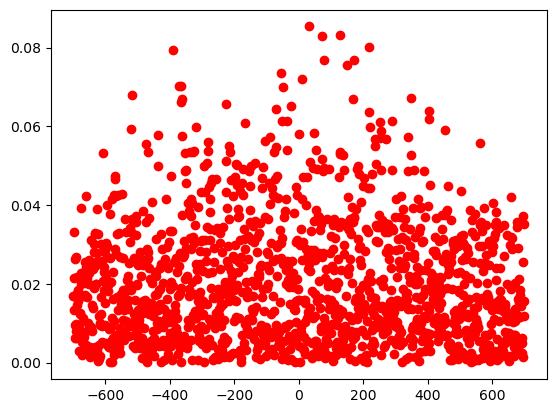

32
4


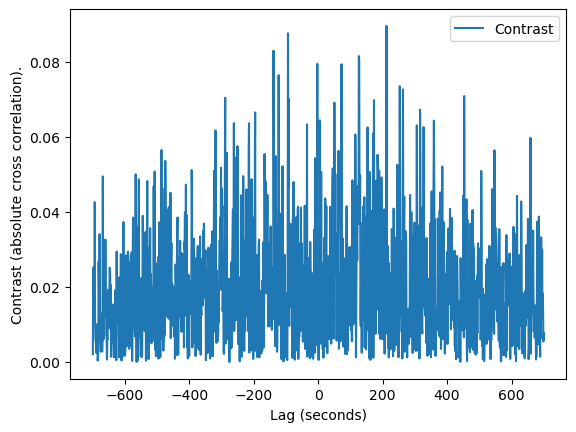

          Contrast
LagRange          
-700.0    0.002102
-699.0    0.018943
-698.0    0.025224
-697.0    0.021651
-696.0    0.015196
...            ...
 696.0    0.011755
 697.0    0.018245
 698.0    0.013781
 699.0    0.005499
 700.0    0.007661

[1401 rows x 1 columns]


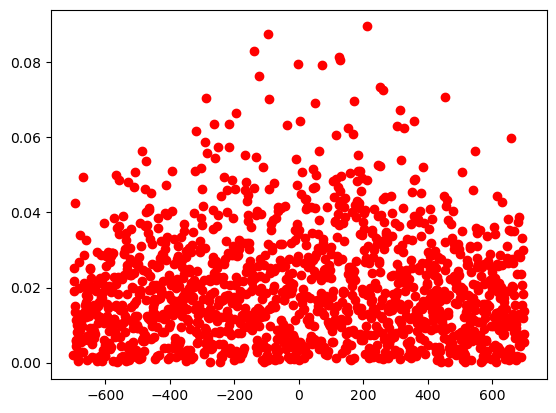

212
5


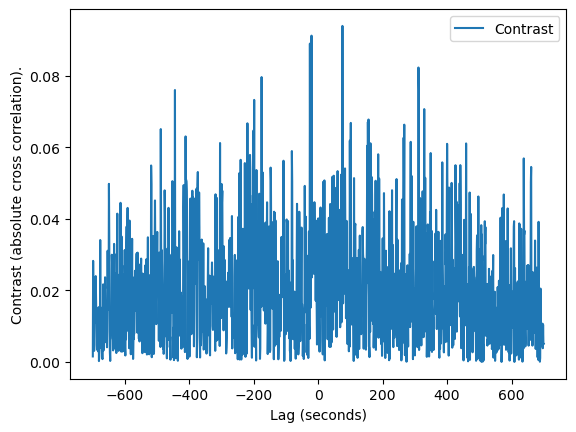

          Contrast
LagRange          
-700.0    0.001536
-699.0    0.028246
-698.0    0.015405
-697.0    0.008551
-696.0    0.003087
...            ...
 696.0    0.010697
 697.0    0.003830
 698.0    0.010414
 699.0    0.004923
 700.0    0.005070

[1401 rows x 1 columns]


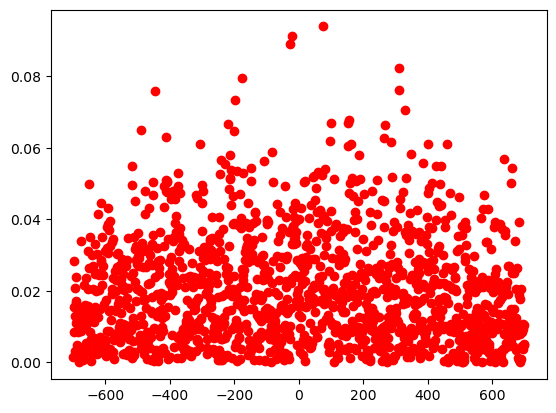

75
6


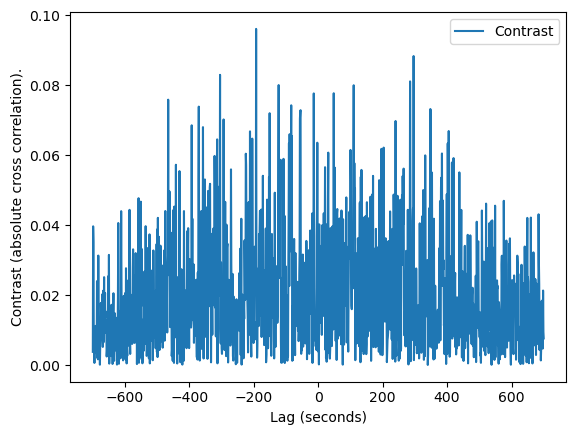

          Contrast
LagRange          
-700.0    0.003779
-699.0    0.039688
-698.0    0.035195
-697.0    0.005717
-696.0    0.004083
...            ...
 696.0    0.018536
 697.0    0.004720
 698.0    0.021319
 699.0    0.009499
 700.0    0.007622

[1401 rows x 1 columns]


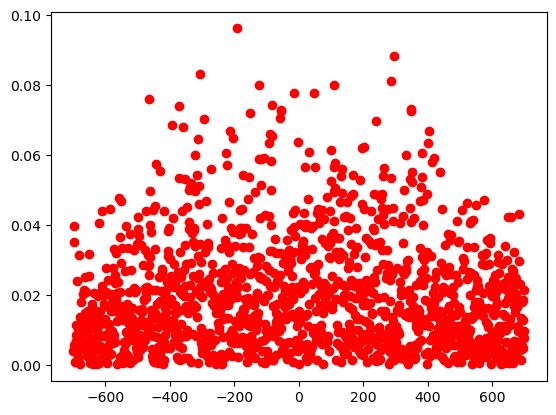

-193
7


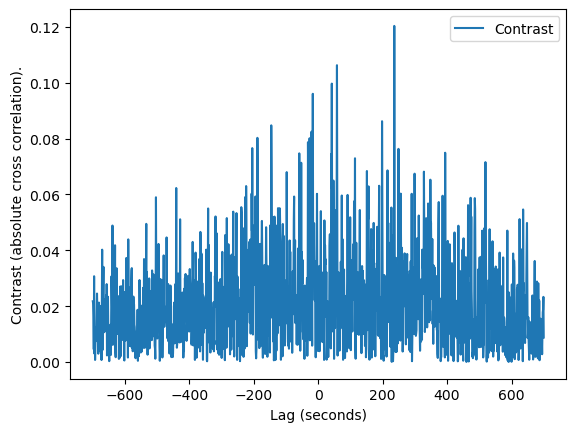

          Contrast
LagRange          
-700.0    0.021737
-699.0    0.020905
-698.0    0.016263
-697.0    0.004537
-696.0    0.030704
...            ...
 696.0    0.009206
 697.0    0.017826
 698.0    0.018737
 699.0    0.023315
 700.0    0.008770

[1401 rows x 1 columns]


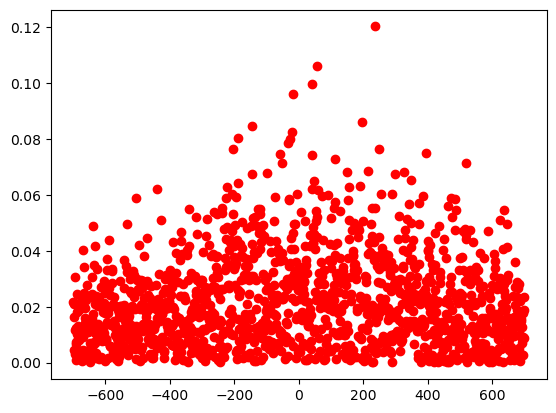

236
8


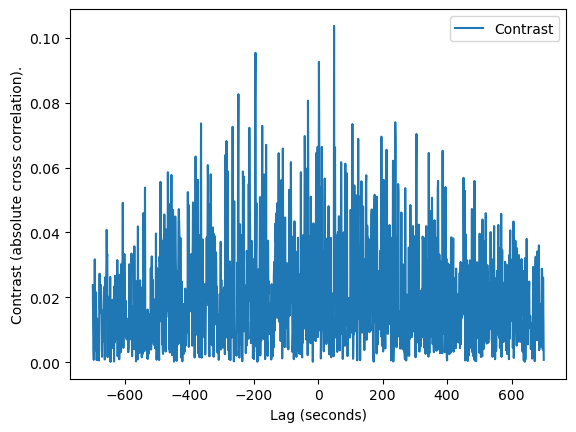

          Contrast
LagRange          
-700.0    0.023785
-699.0    0.010972
-698.0    0.004250
-697.0    0.000722
-696.0    0.010667
...            ...
 696.0    0.013247
 697.0    0.003896
 698.0    0.026082
 699.0    0.011546
 700.0    0.000704

[1401 rows x 1 columns]


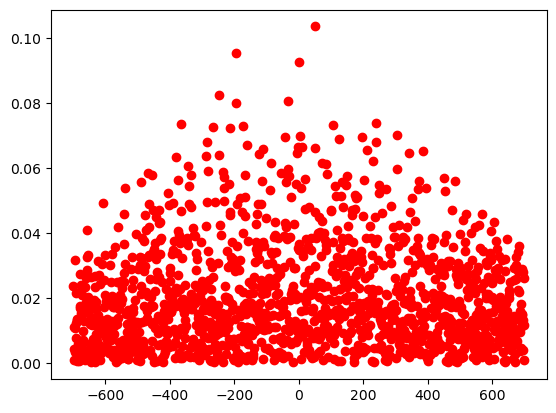

49
9


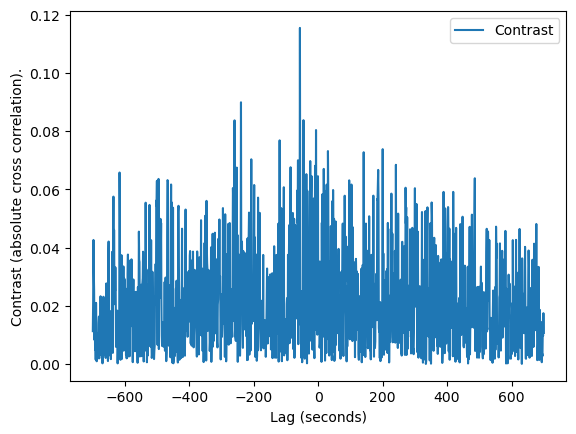

          Contrast
LagRange          
-700.0    0.011287
-699.0    0.021545
-698.0    0.042632
-697.0    0.031619
-696.0    0.025310
...            ...
 696.0    0.002727
 697.0    0.011003
 698.0    0.009644
 699.0    0.017469
 700.0    0.010664

[1401 rows x 1 columns]


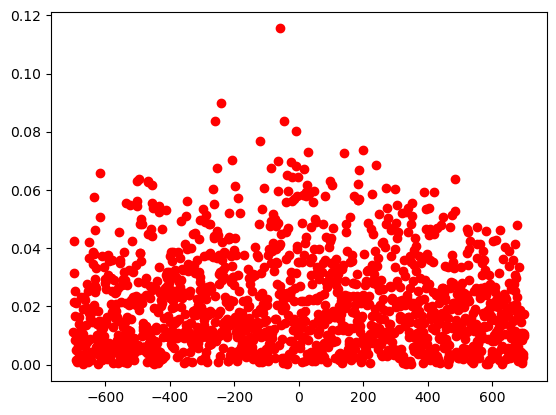

-57
10


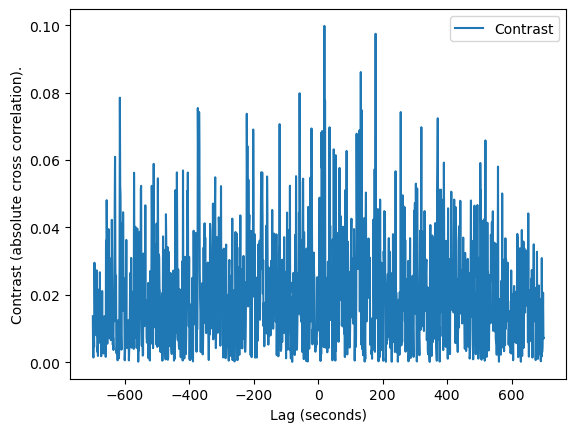

          Contrast
LagRange          
-700.0    0.013633
-699.0    0.002150
-698.0    0.001386
-697.0    0.009654
-696.0    0.004557
...            ...
 696.0    0.004493
 697.0    0.010425
 698.0    0.020609
 699.0    0.006943
 700.0    0.007243

[1401 rows x 1 columns]


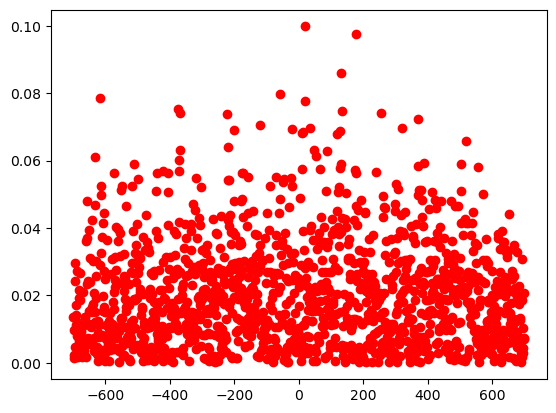

19
11


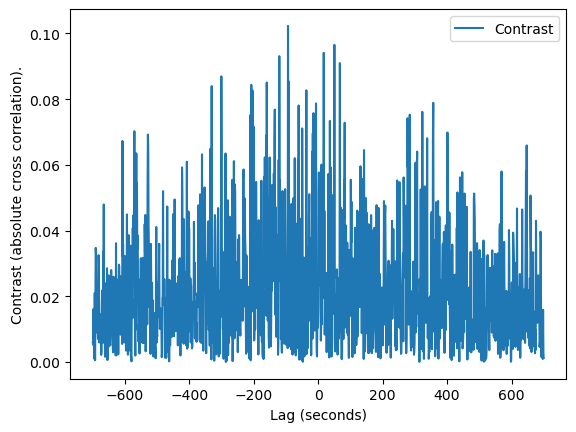

          Contrast
LagRange          
-700.0    0.005952
-699.0    0.005308
-698.0    0.016197
-697.0    0.005165
-696.0    0.014544
...            ...
 696.0    0.009114
 697.0    0.000949
 698.0    0.015920
 699.0    0.002817
 700.0    0.001262

[1401 rows x 1 columns]


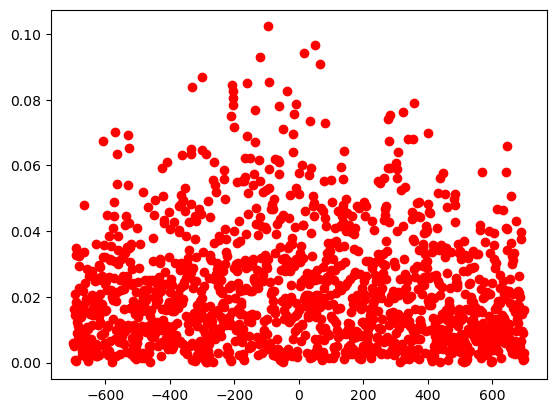

-94
12


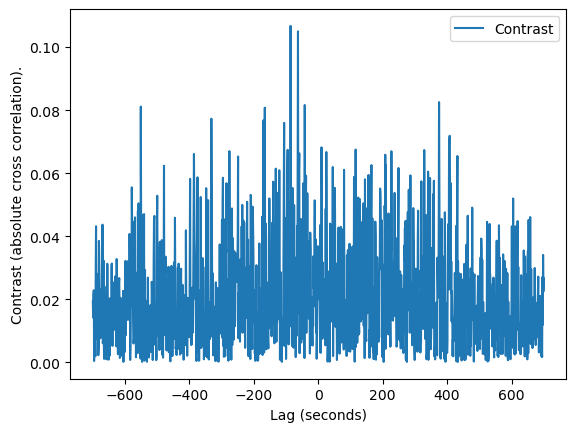

          Contrast
LagRange          
-700.0    0.019378
-699.0    0.014175
-698.0    0.021556
-697.0    0.022823
-696.0    0.000377
...            ...
 696.0    0.027041
 697.0    0.011852
 698.0    0.034037
 699.0    0.022461
 700.0    0.026619

[1401 rows x 1 columns]


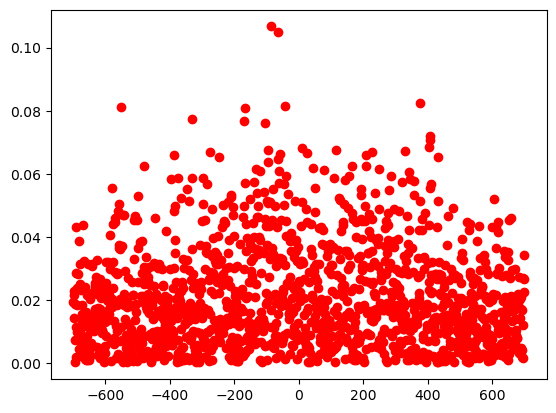

-86
13


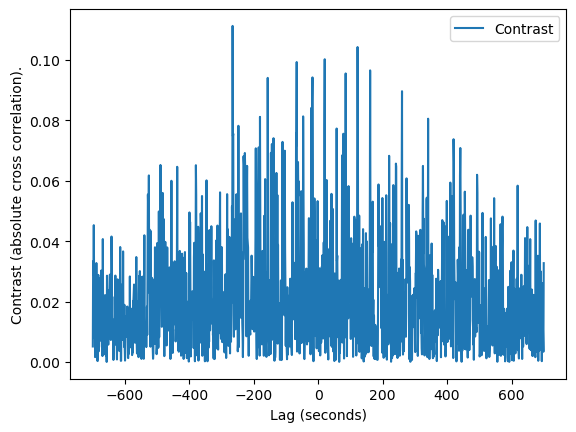

          Contrast
LagRange          
-700.0    0.005128
-699.0    0.033340
-698.0    0.028732
-697.0    0.045294
-696.0    0.024200
...            ...
 696.0    0.026049
 697.0    0.013807
 698.0    0.009321
 699.0    0.003381
 700.0    0.032719

[1401 rows x 1 columns]


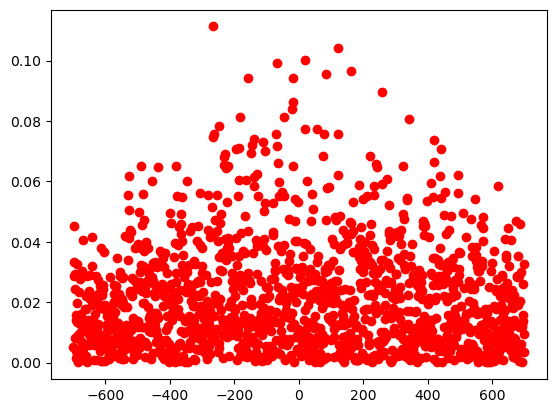

-266
14


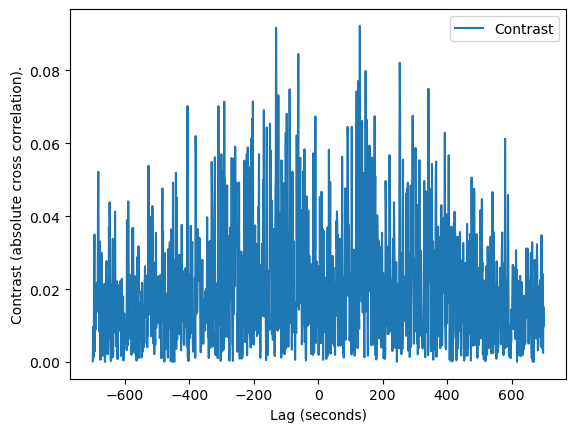

          Contrast
LagRange          
-700.0    0.000203
-699.0    0.009609
-698.0    0.001219
-697.0    0.007784
-696.0    0.023074
...            ...
 696.0    0.024226
 697.0    0.005984
 698.0    0.002528
 699.0    0.015219
 700.0    0.009940

[1401 rows x 1 columns]


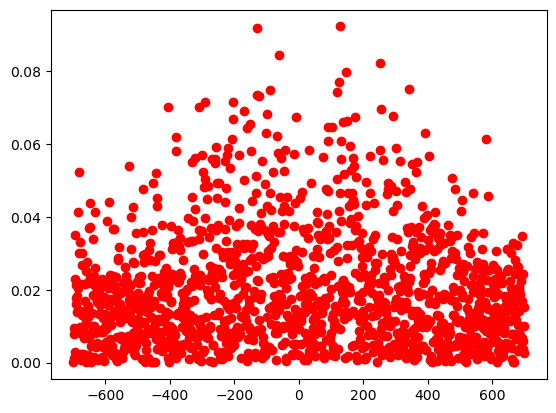

129
15


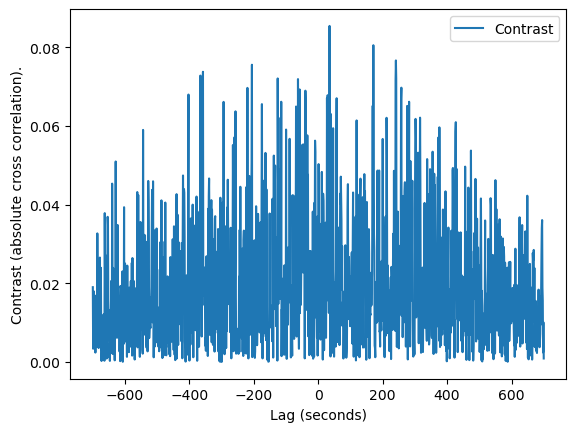

          Contrast
LagRange          
-700.0    0.019029
-699.0    0.003384
-698.0    0.008610
-697.0    0.017974
-696.0    0.009001
...            ...
 696.0    0.018912
 697.0    0.015702
 698.0    0.002432
 699.0    0.010106
 700.0    0.000902

[1401 rows x 1 columns]


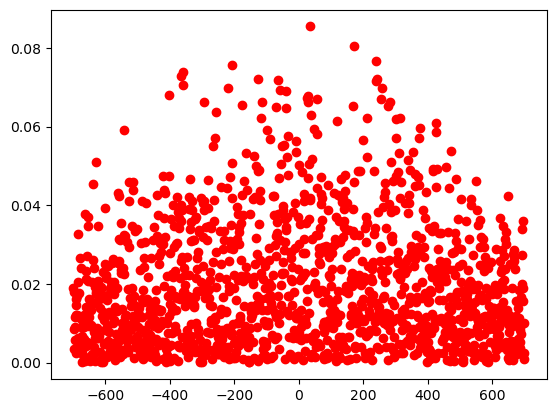

35
16


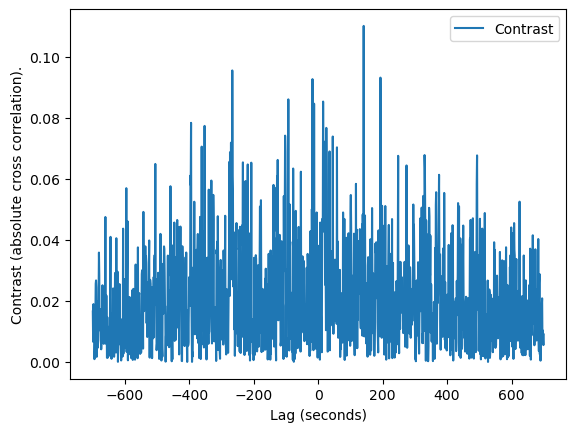

          Contrast
LagRange          
-700.0    0.016576
-699.0    0.006638
-698.0    0.018986
-697.0    0.011187
-696.0    0.017406
...            ...
 696.0    0.006612
 697.0    0.010354
 698.0    0.007406
 699.0    0.005551
 700.0    0.009030

[1401 rows x 1 columns]


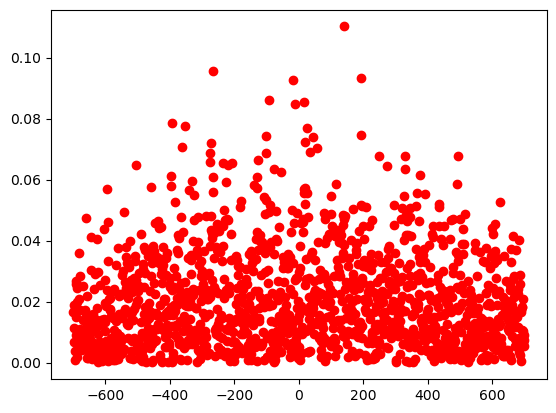

141
17


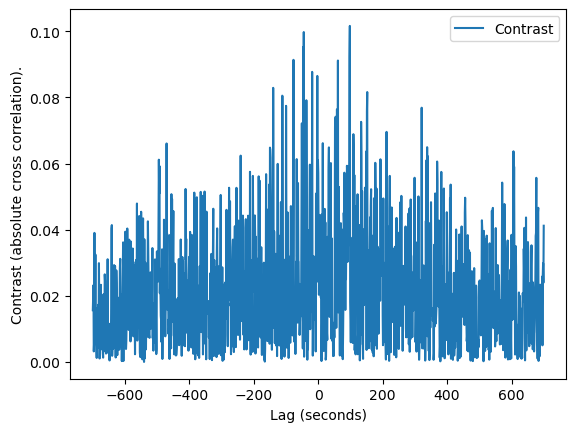

          Contrast
LagRange          
-700.0    0.015650
-699.0    0.019674
-698.0    0.023205
-697.0    0.003187
-696.0    0.005785
...            ...
 696.0    0.005019
 697.0    0.026179
 698.0    0.029831
 699.0    0.023945
 700.0    0.041194

[1401 rows x 1 columns]


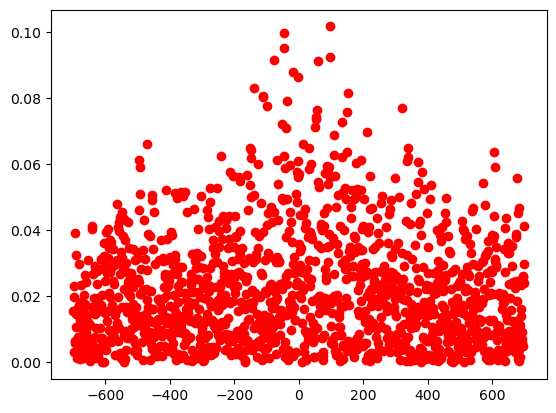

98
18


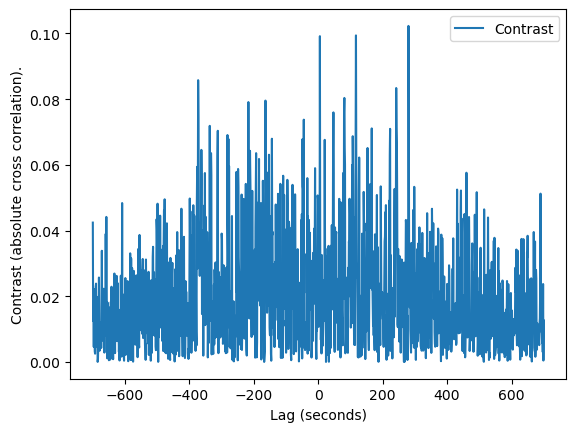

          Contrast
LagRange          
-700.0    0.042420
-699.0    0.012436
-698.0    0.018483
-697.0    0.004579
-696.0    0.022153
...            ...
 696.0    0.008535
 697.0    0.003003
 698.0    0.023715
 699.0    0.000425
 700.0    0.012624

[1401 rows x 1 columns]


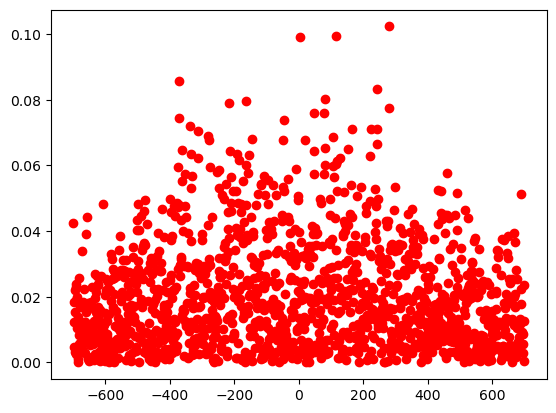

280
19


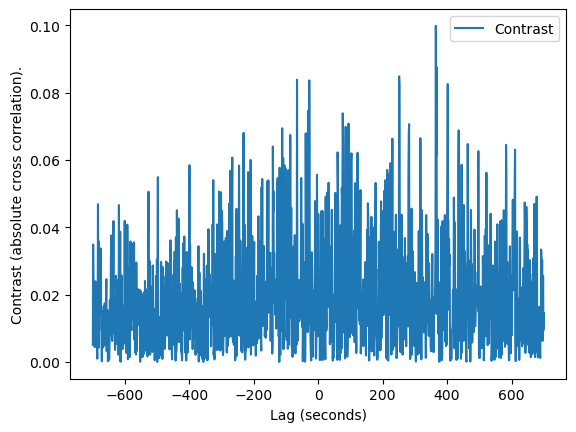

          Contrast
LagRange          
-700.0    0.005109
-699.0    0.034862
-698.0    0.021222
-697.0    0.008797
-696.0    0.016115
...            ...
 696.0    0.006228
 697.0    0.009786
 698.0    0.025565
 699.0    0.009425
 700.0    0.014468

[1401 rows x 1 columns]


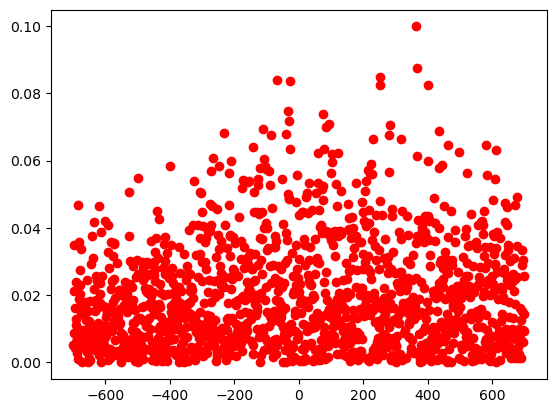

365
20


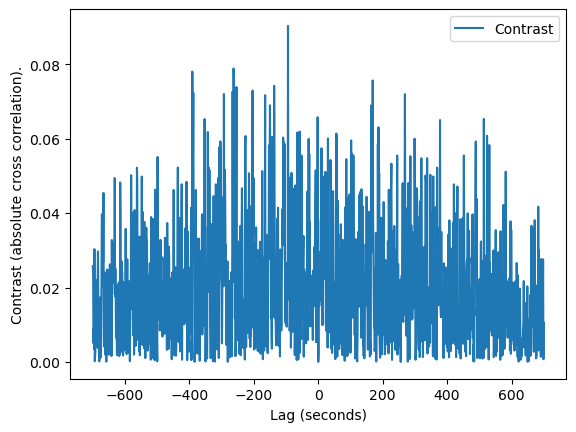

          Contrast
LagRange          
-700.0    0.025744
-699.0    0.023510
-698.0    0.005035
-697.0    0.009001
-696.0    0.003462
...            ...
 696.0    0.003103
 697.0    0.010866
 698.0    0.027590
 699.0    0.000733
 700.0    0.010519

[1401 rows x 1 columns]


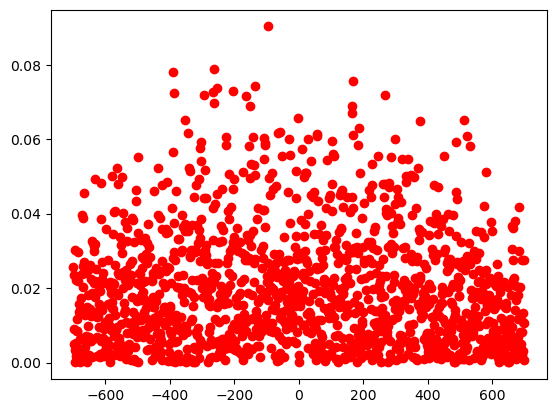

-94
21


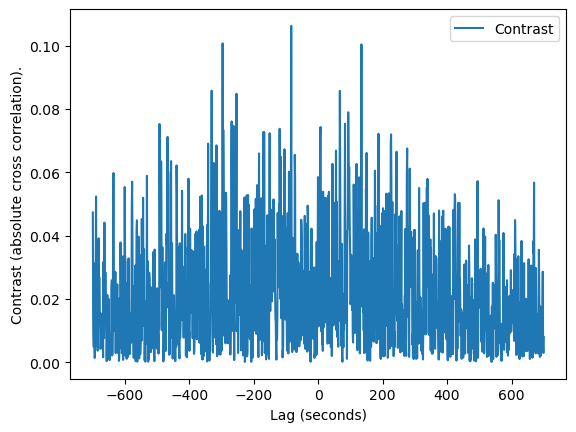

          Contrast
LagRange          
-700.0    0.047279
-699.0    0.018729
-698.0    0.008782
-697.0    0.004753
-696.0    0.031199
...            ...
 696.0    0.017573
 697.0    0.028573
 698.0    0.005698
 699.0    0.002894
 700.0    0.007974

[1401 rows x 1 columns]


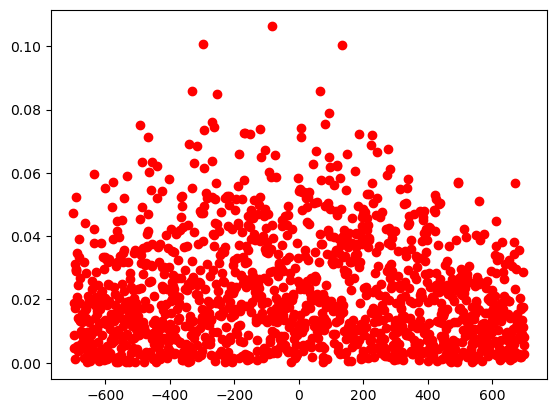

-84
22


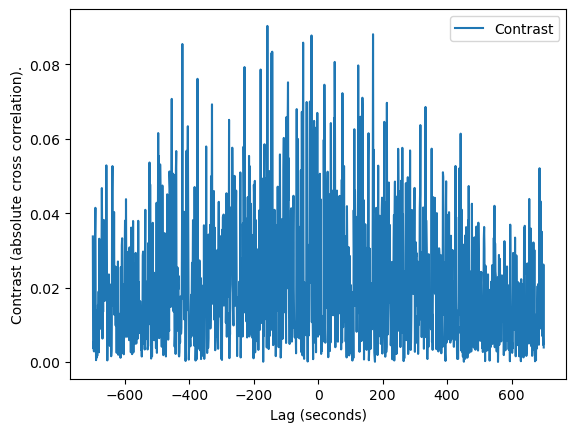

          Contrast
LagRange          
-700.0    0.033751
-699.0    0.003699
-698.0    0.005413
-697.0    0.002951
-696.0    0.002831
...            ...
 696.0    0.019437
 697.0    0.010465
 698.0    0.004599
 699.0    0.026200
 700.0    0.003898

[1401 rows x 1 columns]


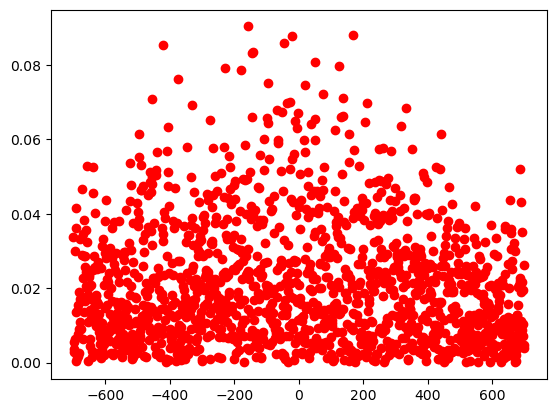

-158
23


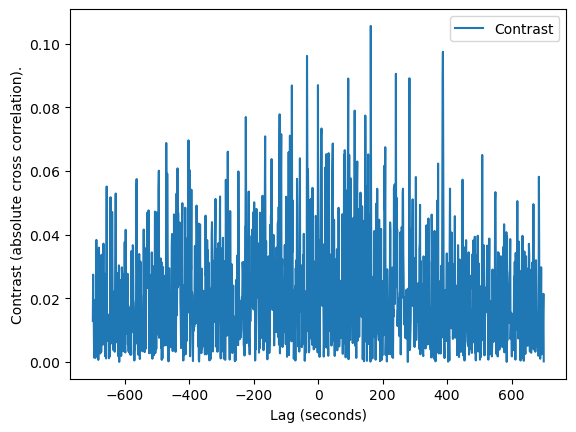

          Contrast
LagRange          
-700.0    0.012895
-699.0    0.027451
-698.0    0.013737
-697.0    0.012112
-696.0    0.001396
...            ...
 696.0    0.003951
 697.0    0.005306
 698.0    0.015629
 699.0    0.021426
 700.0    0.000171

[1401 rows x 1 columns]


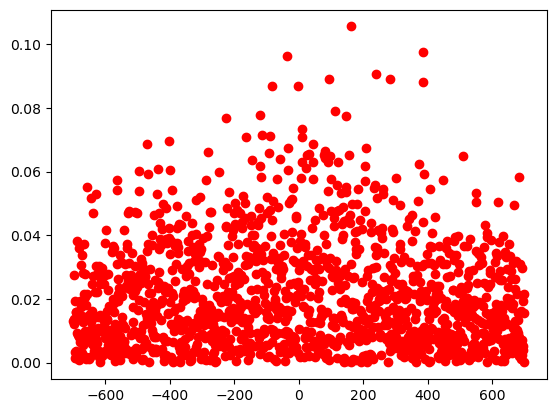

163
24


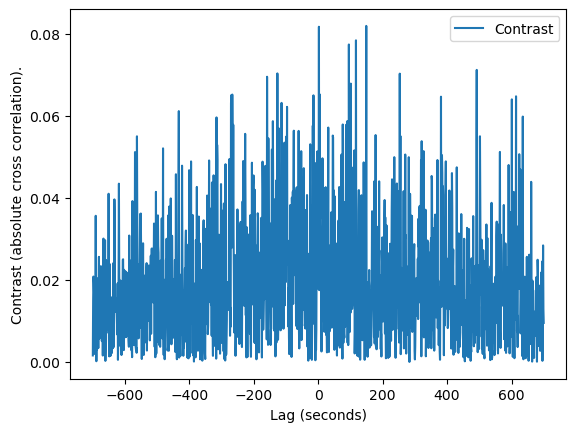

          Contrast
LagRange          
-700.0    0.001604
-699.0    0.014915
-698.0    0.020815
-697.0    0.019230
-696.0    0.016360
...            ...
 696.0    0.000294
 697.0    0.015619
 698.0    0.028401
 699.0    0.012902
 700.0    0.009528

[1401 rows x 1 columns]


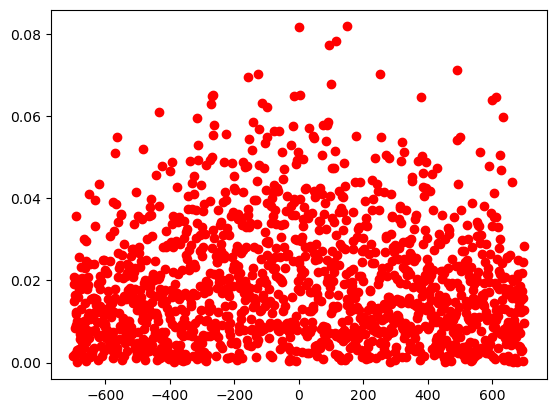

149
25


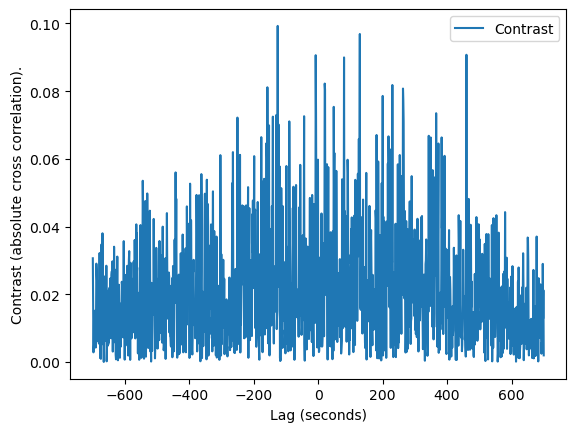

          Contrast
LagRange          
-700.0    0.030633
-699.0    0.016621
-698.0    0.002847
-697.0    0.005182
-696.0    0.014837
...            ...
 696.0    0.003413
 697.0    0.028983
 698.0    0.012811
 699.0    0.021206
 700.0    0.001954

[1401 rows x 1 columns]


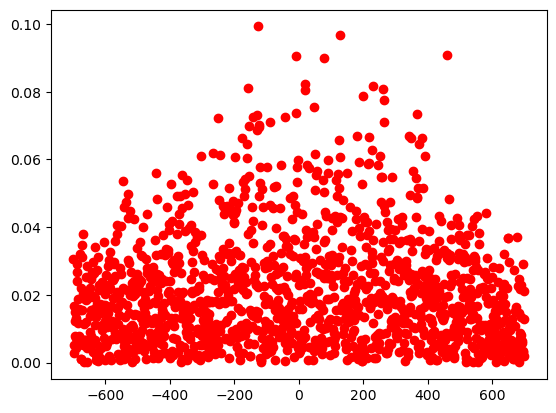

-126
26


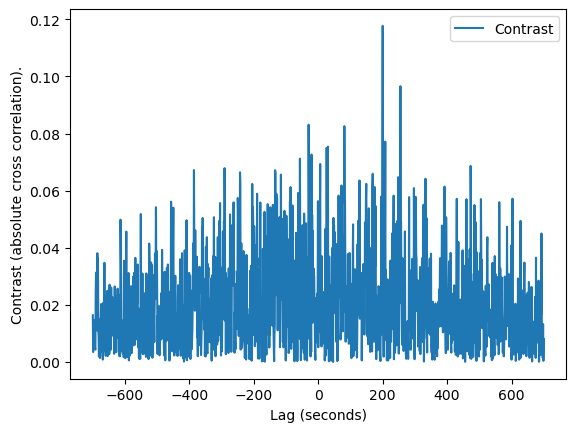

          Contrast
LagRange          
-700.0    0.016337
-699.0    0.003474
-698.0    0.011531
-697.0    0.006664
-696.0    0.006355
...            ...
 696.0    0.006681
 697.0    0.001399
 698.0    0.013254
 699.0    0.000408
 700.0    0.008057

[1401 rows x 1 columns]


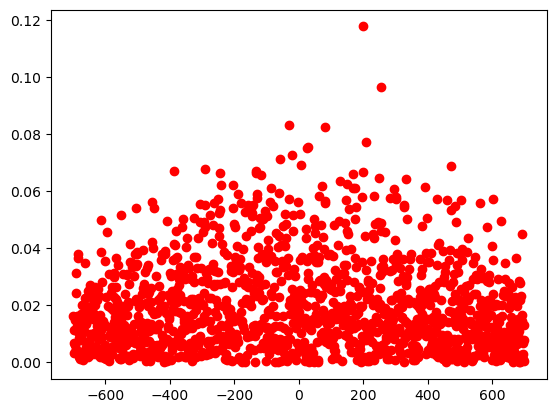

200
27


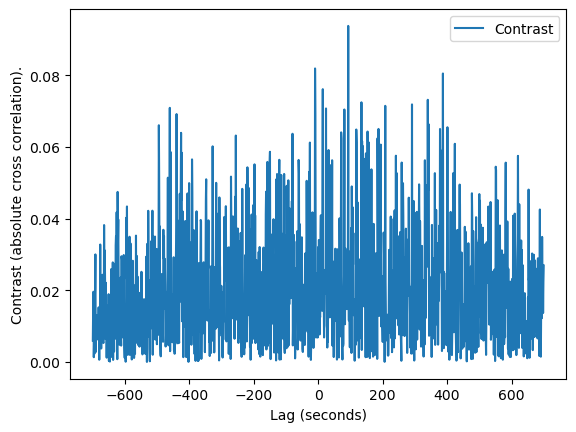

          Contrast
LagRange          
-700.0    0.005993
-699.0    0.014499
-698.0    0.019623
-697.0    0.001355
-696.0    0.005745
...            ...
 696.0    0.019937
 697.0    0.027131
 698.0    0.013680
 699.0    0.022364
 700.0    0.026939

[1401 rows x 1 columns]


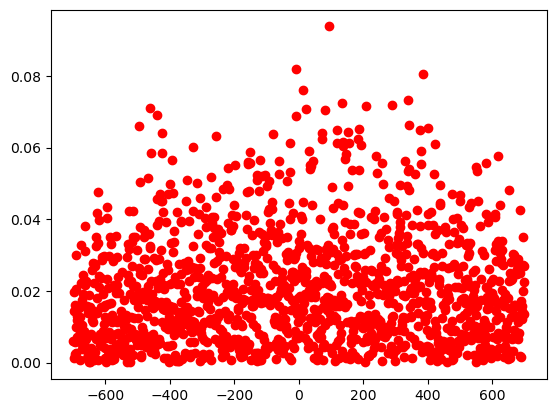

93
28


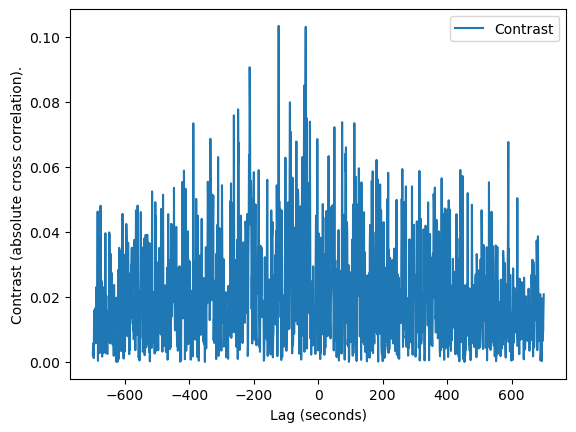

          Contrast
LagRange          
-700.0    0.002128
-699.0    0.005661
-698.0    0.001830
-697.0    0.001180
-696.0    0.015830
...            ...
 696.0    0.006366
 697.0    0.016735
 698.0    0.009056
 699.0    0.015376
 700.0    0.020795

[1401 rows x 1 columns]


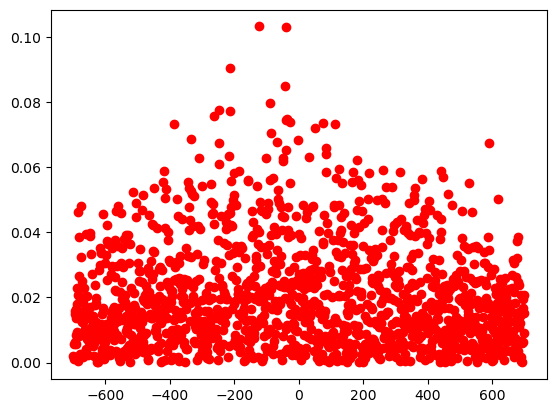

-123
29


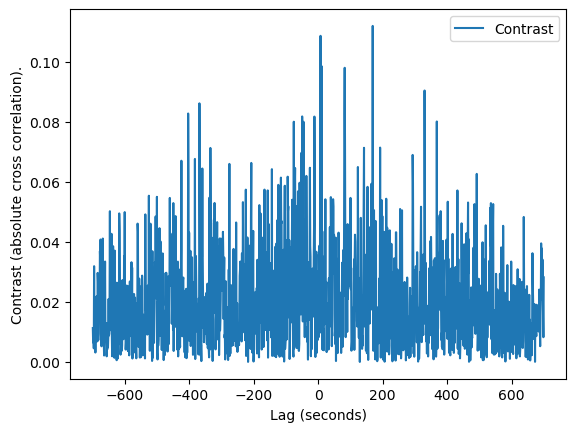

          Contrast
LagRange          
-700.0    0.011269
-699.0    0.006483
-698.0    0.009240
-697.0    0.004527
-696.0    0.031865
...            ...
 696.0    0.034102
 697.0    0.026814
 698.0    0.015157
 699.0    0.008233
 700.0    0.028164

[1401 rows x 1 columns]


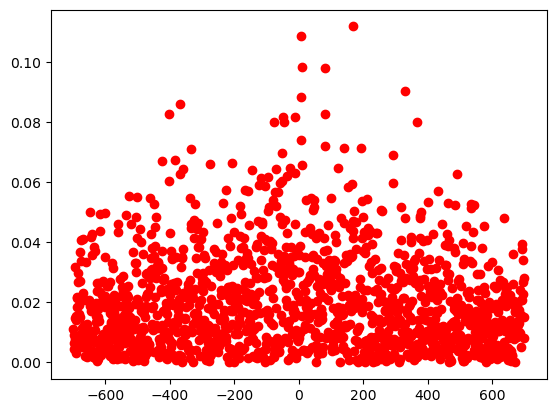

169
30


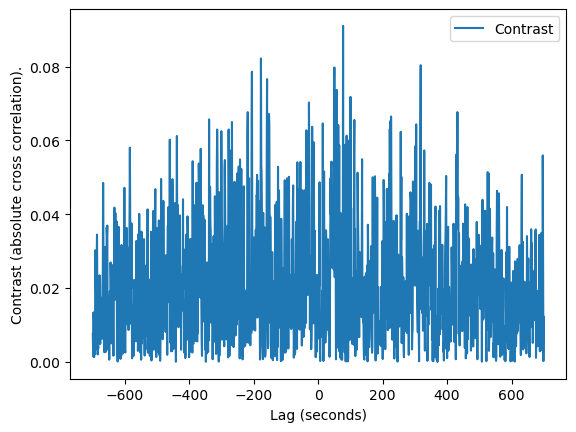

          Contrast
LagRange          
-700.0    0.007640
-699.0    0.001504
-698.0    0.013419
-697.0    0.011815
-696.0    0.001316
...            ...
 696.0    0.006118
 697.0    0.055926
 698.0    0.030417
 699.0    0.000244
 700.0    0.012210

[1401 rows x 1 columns]


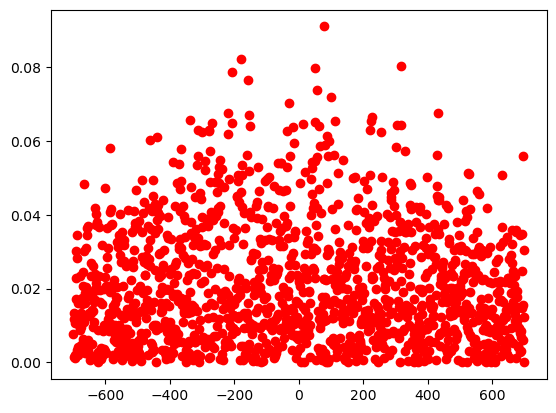

77
31


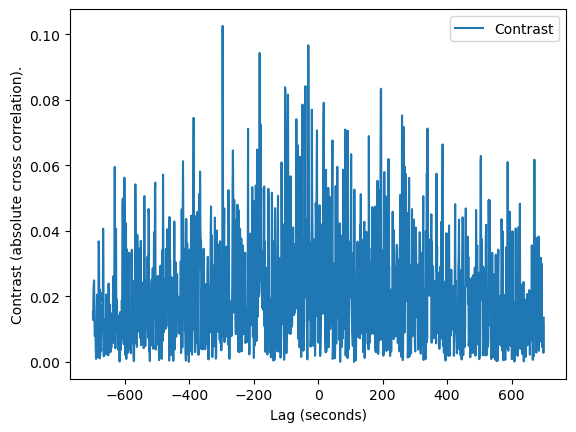

          Contrast
LagRange          
-700.0    0.015171
-699.0    0.012803
-698.0    0.021507
-697.0    0.023716
-696.0    0.024893
...            ...
 696.0    0.007438
 697.0    0.011930
 698.0    0.011793
 699.0    0.002787
 700.0    0.013526

[1401 rows x 1 columns]


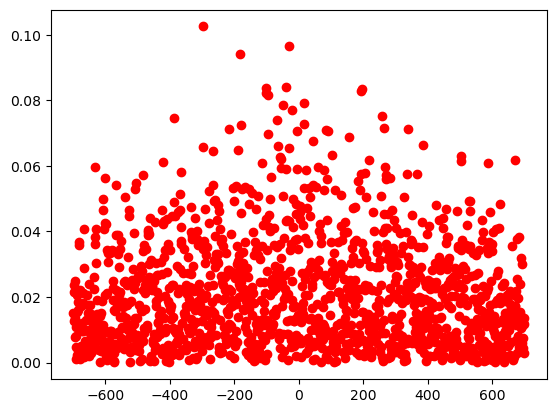

-297
32


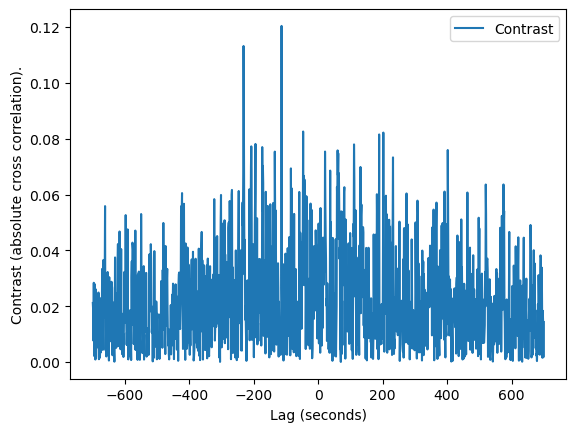

          Contrast
LagRange          
-700.0    0.021173
-699.0    0.018577
-698.0    0.007662
-697.0    0.028397
-696.0    0.002221
...            ...
 696.0    0.001556
 697.0    0.018381
 698.0    0.014754
 699.0    0.001764
 700.0    0.014361

[1401 rows x 1 columns]


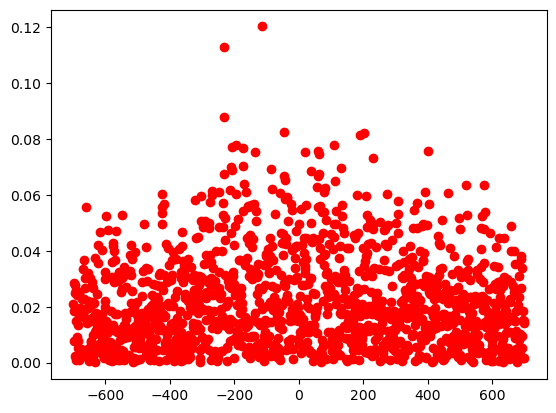

-114
33


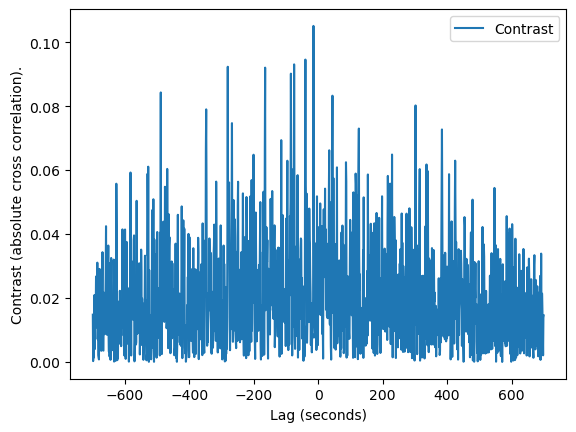

          Contrast
LagRange          
-700.0    0.014780
-699.0    0.000265
-698.0    0.014489
-697.0    0.001361
-696.0    0.019306
...            ...
 696.0    0.015834
 697.0    0.010235
 698.0    0.002070
 699.0    0.013845
 700.0    0.014548

[1401 rows x 1 columns]


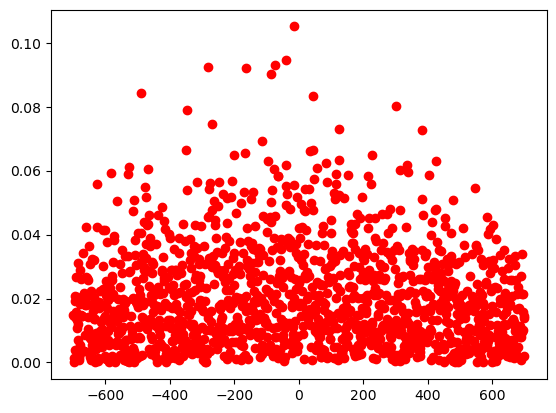

-15
34


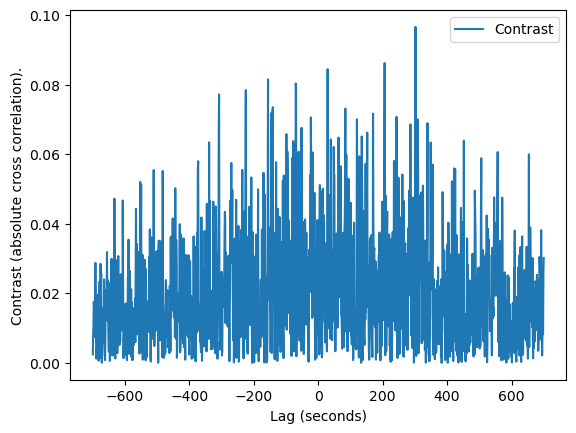

          Contrast
LagRange          
-700.0    0.002455
-699.0    0.007990
-698.0    0.010483
-697.0    0.017575
-696.0    0.015466
...            ...
 696.0    0.007683
 697.0    0.009313
 698.0    0.008379
 699.0    0.026690
 700.0    0.030155

[1401 rows x 1 columns]


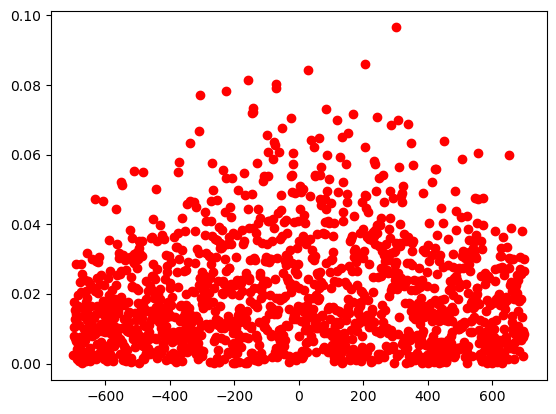

302
35


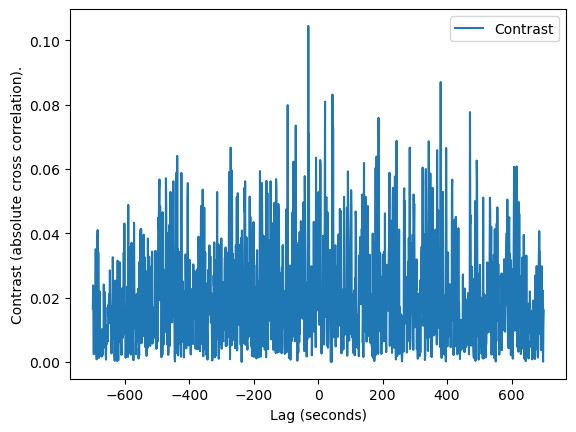

          Contrast
LagRange          
-700.0    0.016588
-699.0    0.023775
-698.0    0.014637
-697.0    0.002402
-696.0    0.017562
...            ...
 696.0    0.022372
 697.0    0.004899
 698.0    0.000090
 699.0    0.011974
 700.0    0.016075

[1401 rows x 1 columns]


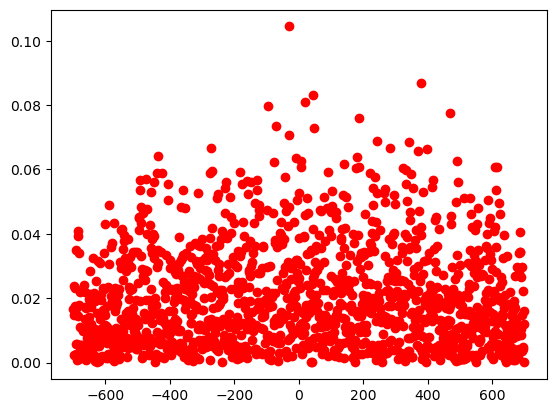

-31
36


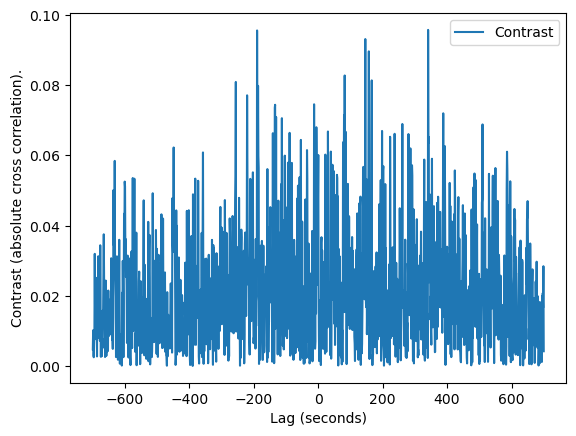

          Contrast
LagRange          
-700.0    0.004797
-699.0    0.010206
-698.0    0.002962
-697.0    0.002521
-696.0    0.006537
...            ...
 696.0    0.016042
 697.0    0.020785
 698.0    0.016616
 699.0    0.028452
 700.0    0.004232

[1401 rows x 1 columns]


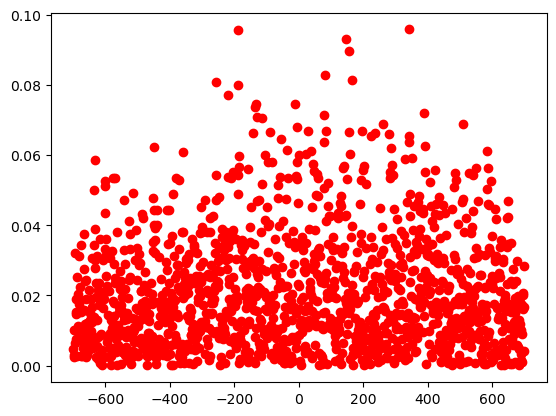

341
37


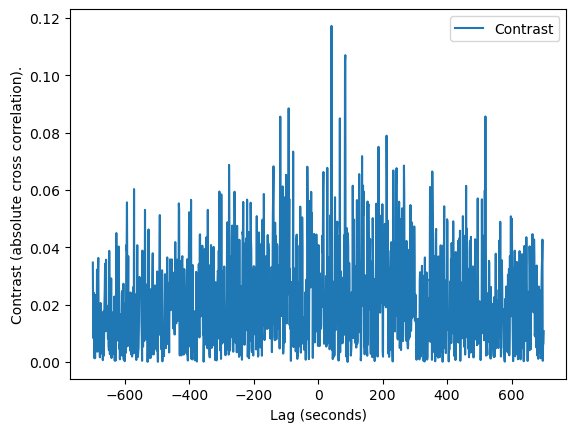

          Contrast
LagRange          
-700.0    0.034675
-699.0    0.015876
-698.0    0.008276
-697.0    0.024113
-696.0    0.006065
...            ...
 696.0    0.042676
 697.0    0.000379
 698.0    0.006337
 699.0    0.006340
 700.0    0.010730

[1401 rows x 1 columns]


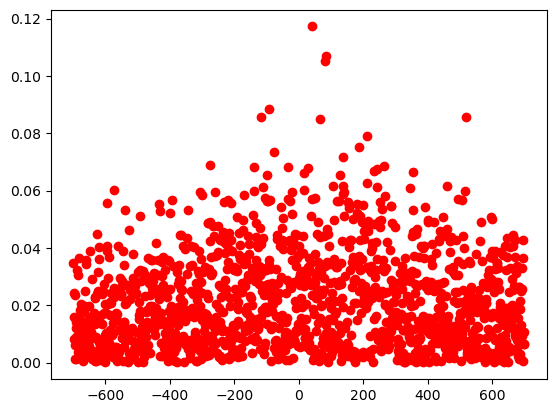

41
38


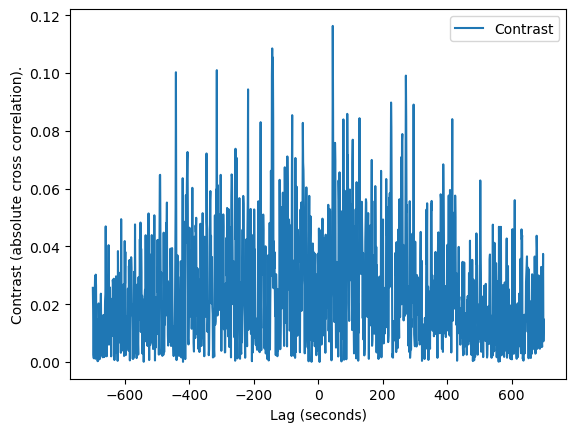

          Contrast
LagRange          
-700.0    0.025670
-699.0    0.018047
-698.0    0.002495
-697.0    0.001301
-696.0    0.017016
...            ...
 696.0    0.013508
 697.0    0.022087
 698.0    0.037417
 699.0    0.007177
 700.0    0.014669

[1401 rows x 1 columns]


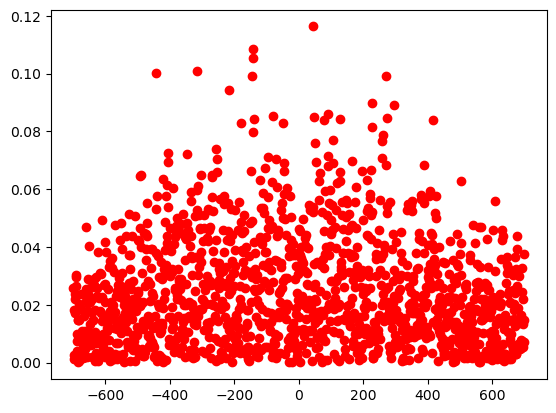

45
39


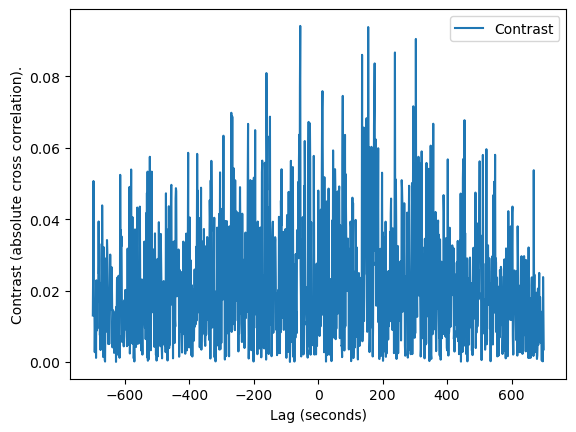

          Contrast
LagRange          
-700.0    0.013030
-699.0    0.026120
-698.0    0.050705
-697.0    0.021214
-696.0    0.014500
...            ...
 696.0    0.005221
 697.0    0.000181
 698.0    0.023793
 699.0    0.014738
 700.0    0.003535

[1401 rows x 1 columns]


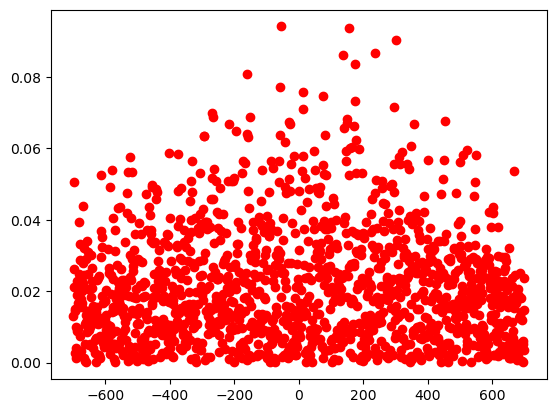

-56
40


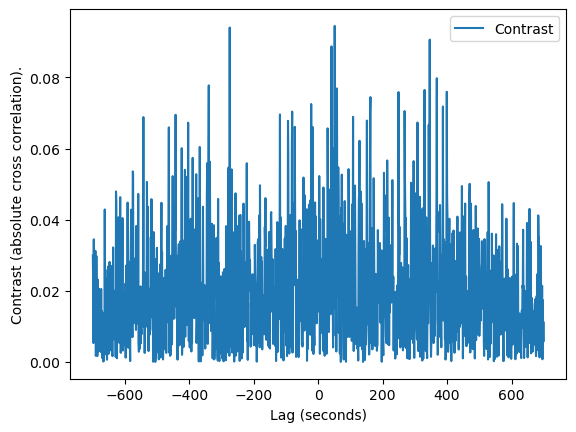

          Contrast
LagRange          
-700.0    0.029889
-699.0    0.022379
-698.0    0.005311
-697.0    0.034477
-696.0    0.014371
...            ...
 696.0    0.000755
 697.0    0.017425
 698.0    0.010025
 699.0    0.005702
 700.0    0.011070

[1401 rows x 1 columns]


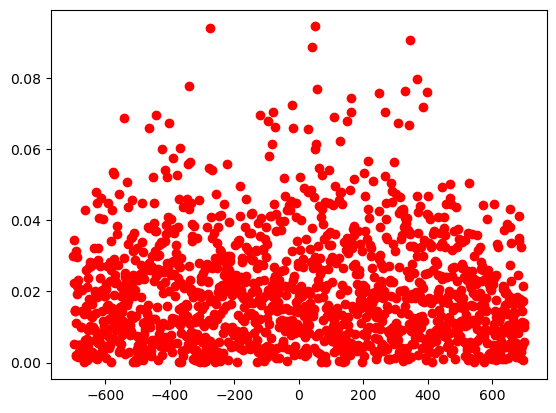

51
41


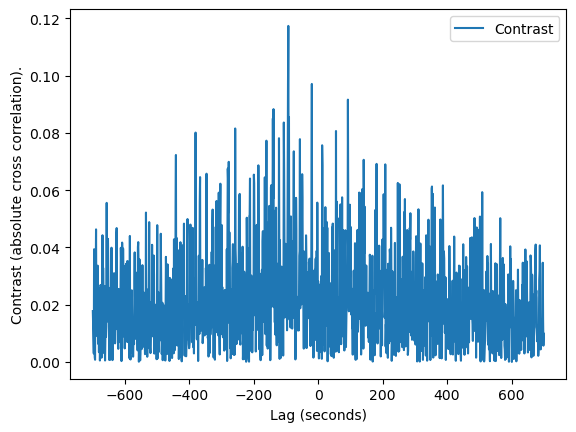

          Contrast
LagRange          
-700.0    0.017754
-699.0    0.012204
-698.0    0.006867
-697.0    0.002963
-696.0    0.039373
...            ...
 696.0    0.014206
 697.0    0.034658
 698.0    0.015080
 699.0    0.005700
 700.0    0.009873

[1401 rows x 1 columns]


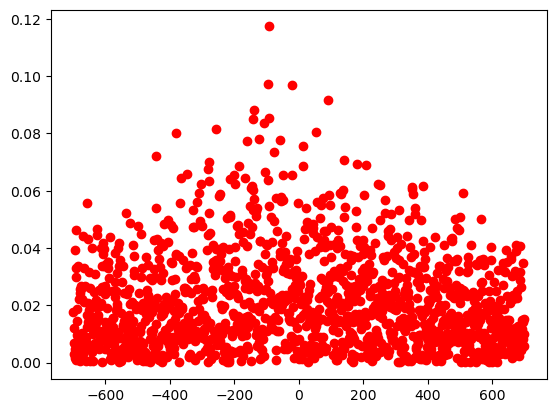

-93
42


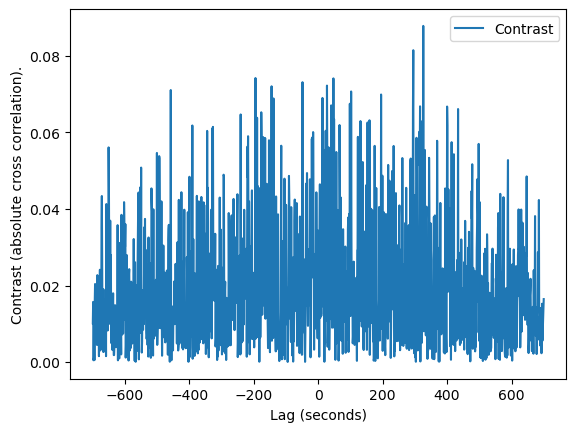

          Contrast
LagRange          
-700.0    0.010126
-699.0    0.015712
-698.0    0.000464
-697.0    0.001231
-696.0    0.010981
...            ...
 696.0    0.005580
 697.0    0.008096
 698.0    0.010174
 699.0    0.012749
 700.0    0.016450

[1401 rows x 1 columns]


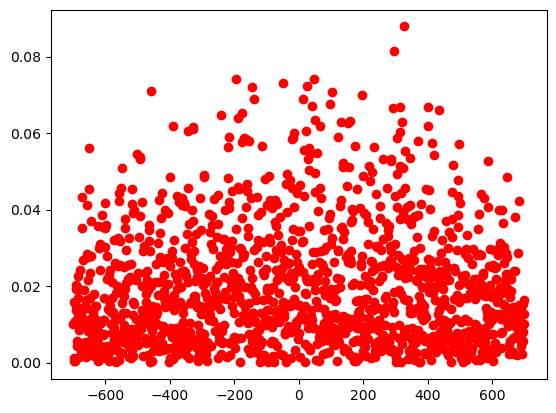

326
43


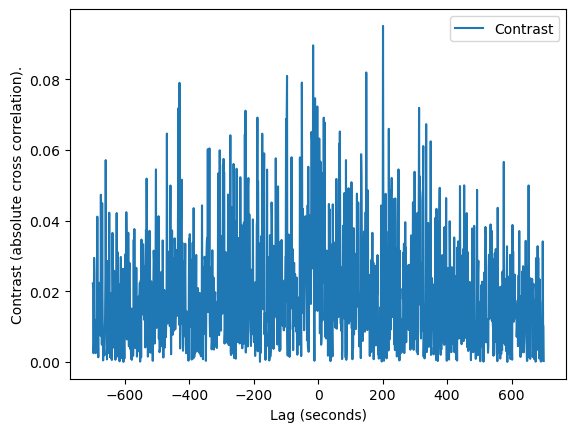

          Contrast
LagRange          
-700.0    0.022235
-699.0    0.020735
-698.0    0.002476
-697.0    0.004986
-696.0    0.029449
...            ...
 696.0    0.013953
 697.0    0.034117
 698.0    0.010665
 699.0    0.010097
 700.0    0.000262

[1401 rows x 1 columns]


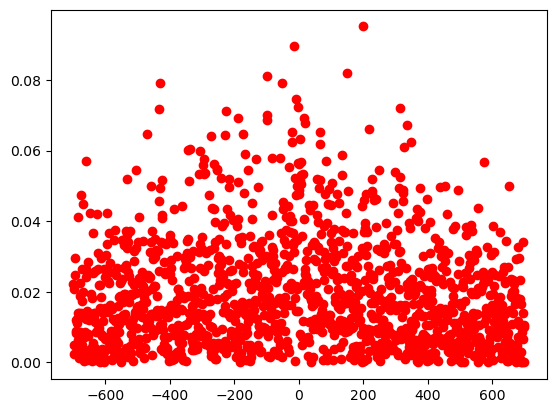

201
44


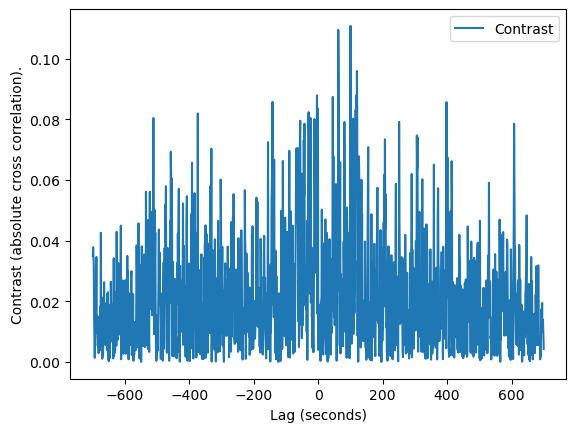

          Contrast
LagRange          
-700.0    0.034966
-699.0    0.037839
-698.0    0.034407
-697.0    0.031371
-696.0    0.015513
...            ...
 696.0    0.009975
 697.0    0.013943
 698.0    0.012643
 699.0    0.007936
 700.0    0.004290

[1401 rows x 1 columns]


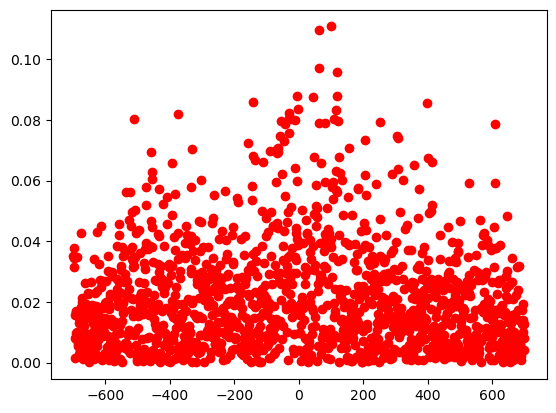

100
45


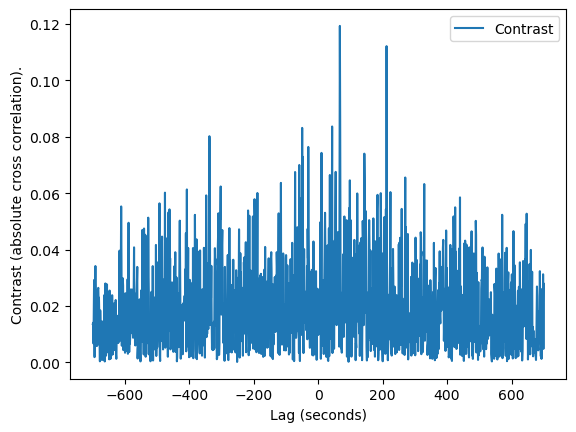

          Contrast
LagRange          
-700.0    0.013555
-699.0    0.014003
-698.0    0.006635
-697.0    0.019597
-696.0    0.029186
...            ...
 696.0    0.009405
 697.0    0.006249
 698.0    0.031209
 699.0    0.004726
 700.0    0.027817

[1401 rows x 1 columns]


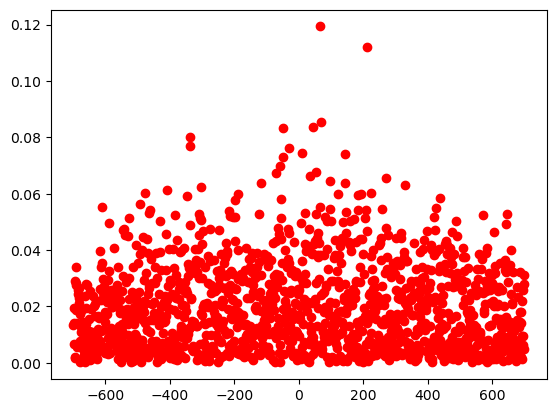

67
46


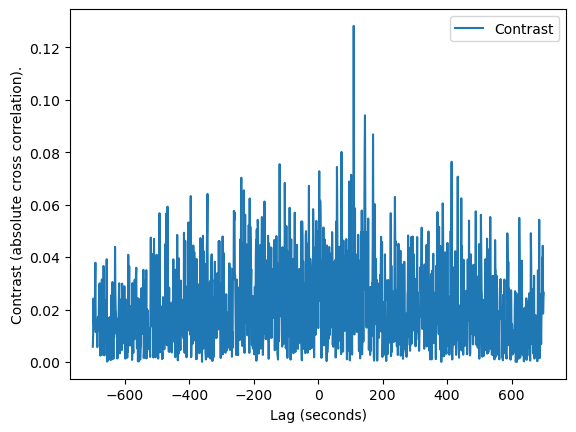

          Contrast
LagRange          
-700.0    0.005792
-699.0    0.010772
-698.0    0.024167
-697.0    0.015553
-696.0    0.012650
...            ...
 696.0    0.020696
 697.0    0.044290
 698.0    0.018447
 699.0    0.024136
 700.0    0.026408

[1401 rows x 1 columns]


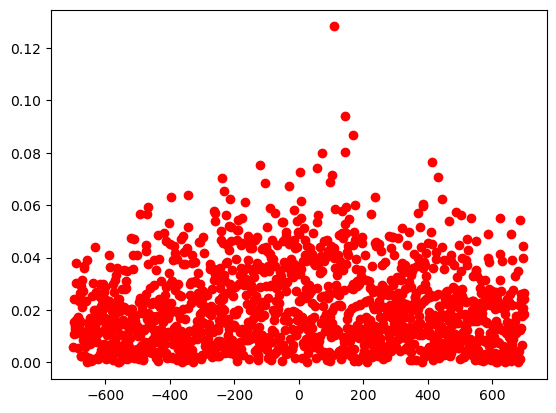

110
47


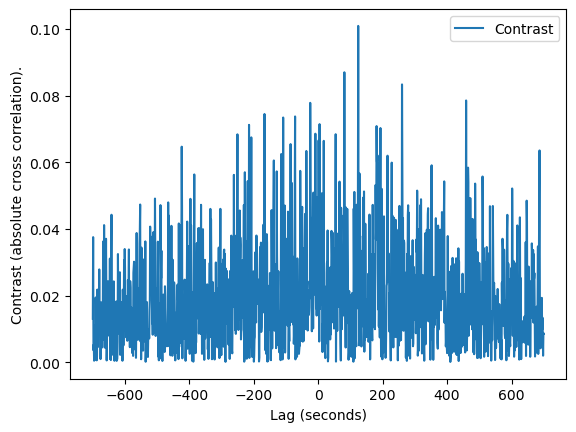

          Contrast
LagRange          
-700.0    0.013049
-699.0    0.037541
-698.0    0.003577
-697.0    0.005298
-696.0    0.000435
...            ...
 696.0    0.013386
 697.0    0.008860
 698.0    0.001947
 699.0    0.008784
 700.0    0.008498

[1401 rows x 1 columns]


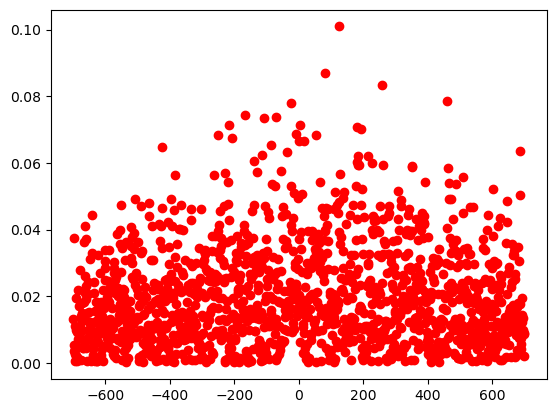

124
48


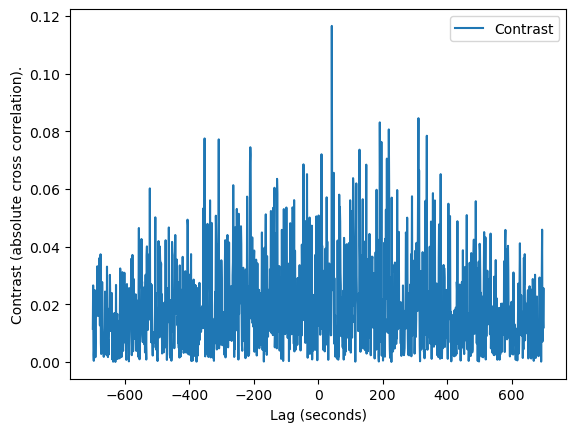

          Contrast
LagRange          
-700.0    0.011526
-699.0    0.026556
-698.0    0.002480
-697.0    0.000422
-696.0    0.004839
...            ...
 696.0    0.007081
 697.0    0.009730
 698.0    0.017532
 699.0    0.025630
 700.0    0.012016

[1401 rows x 1 columns]


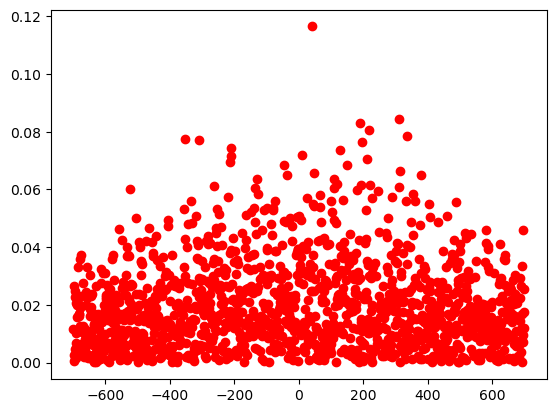

42
49


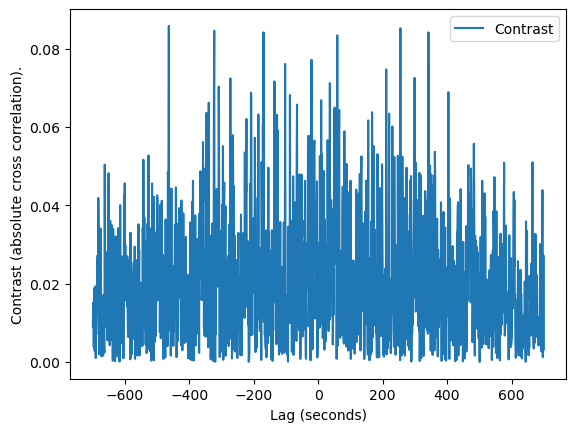

          Contrast
LagRange          
-700.0    0.008918
-699.0    0.015108
-698.0    0.010986
-697.0    0.003809
-696.0    0.018811
...            ...
 696.0    0.043838
 697.0    0.001221
 698.0    0.002312
 699.0    0.027191
 700.0    0.003250

[1401 rows x 1 columns]


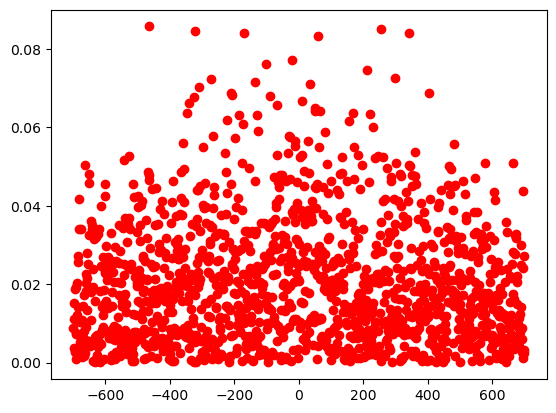

-464


In [20]:
diction = {}
total = data.sum(axis=1)
for j in range(50):
    print(j)
    lag = ll.LeadLag(
        ts1=np.log(data[j]),
        ts2=np.log(total),
        max_lag=700,  # [-X seconds, +X seconds]
        min_precision=1)
    lag.run_inference()
    lag.plot_results()
    print(lag.lead_lag)

    contrast = max(lag.contrasts)
    diction[j] = (contrast, lag.lead_lag)

In [ ]:
# All pairs

# diction = {}
# for j in range(50):
#     for i in range(j, 50):

#         lag = ll.LeadLag(
#             ts1=data[i].pct_change(),
#             ts2=data[j].pct_change(),
#             max_lag=700,  # [-X seconds, +X seconds]
#             min_precision=1)
#         lag.run_inference()

#         if i == j:
#             print(i, "==", j)
#             lag.plot_results()
#             continue
#         contrast = max(lag.contrasts)
#         diction[(i, j)] = contrast
#         if (contrast > 0.3):
#             print(i, j)

In [ ]:
with open("lead_lag.txt", "w") as fp:
    fp.write(str(diction))